In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import pymc3 as pm
from theano import shared
from sklearn import preprocessing


In [ ]:
import arviz as az 

In [17]:
print('Running on PyMC3 v{}'.format(pm.__version__))


Running on PyMC3 v3.7


In [2]:

data = pd.read_csv('renfe_small.csv.txt')
data

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-22 08:00:25,MADRID,SEVILLA,2019-04-28 08:30:00,2019-04-28 11:14:00,ALVIA,NaN,Turista,Flexible
1,2019-04-22 10:03:24,MADRID,VALENCIA,2019-05-20 06:45:00,2019-05-20 08:38:00,AVE,21.95,Turista,Promo
2,2019-04-25 19:19:46,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
3,2019-04-24 06:21:57,SEVILLA,MADRID,2019-05-03 08:35:00,2019-05-03 15:26:00,LD-MD,34.35,Turista con enlace,Promo +
4,2019-04-19 21:13:55,VALENCIA,MADRID,2019-05-10 09:40:00,2019-05-10 11:20:00,AVE,45.30,Turista,Promo
...,...,...,...,...,...,...,...,...,...
25793,2019-05-01 11:45:12,PONFERRADA,MADRID,2019-05-13 02:36:00,2019-05-13 09:31:00,TRENHOTEL,45.80,Turista,Flexible
25794,2019-04-24 19:26:17,MADRID,SEVILLA,2019-05-25 08:00:00,2019-05-25 10:32:00,AVE,61.45,Preferente,Promo
25795,2019-05-06 13:04:53,MADRID,SEVILLA,2019-05-26 18:00:00,2019-05-26 20:32:00,AVE,60.30,Turista,Promo
25796,2019-05-08 15:00:51,MADRID,SEVILLA,2019-05-14 13:10:00,2019-05-14 20:51:00,MD-LD,34.35,Turista con enlace,Promo +


In [4]:
data.head()
data.describe()



,price
count,22716.000000
mean,63.444532
std,25.912413
min,16.600000
25%,43.662500
50%,60.300000
75%,78.800000
max,214.200000


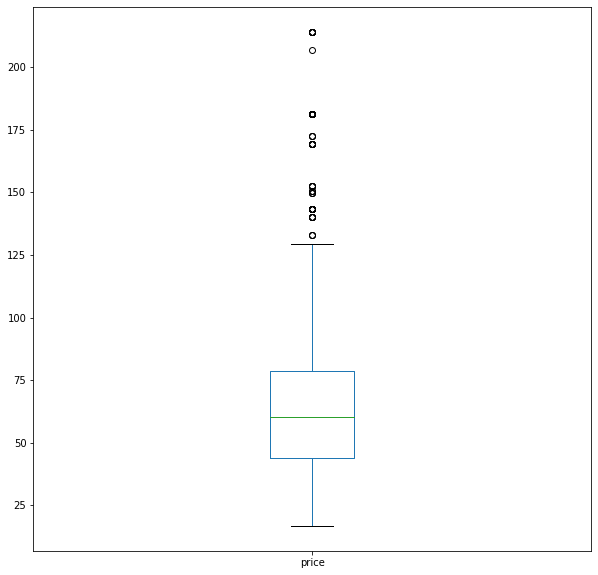

In [6]:
data['price'].plot(kind='box',figsize=(10,10))

In [21]:
data.isnull().sum()/len(data)

insert_date    0.000000
origin         0.000000
destination    0.000000
start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.119467
train_class    0.003993
fare           0.003993
dtype: float64

In [22]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])


In [23]:
data['train_class'].head()


0               Turista
1               Turista
2               Turista
3    Turista con enlace
4               Turista
Name: train_class, dtype: object

In [24]:
data['train_class'].value_counts()

Turista               19598
Preferente             2602
Turista Plus           1877
Turista con enlace     1709
Cama Turista              9
Cama G. Clase             3
Name: train_class, dtype: int64

In [25]:
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])


In [26]:
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

In [27]:
data['price'].value_counts()

62.442987     1764
76.300000     1652
28.350000     1375
85.100000     1285
82.077189     1200
              ... 
90.450000        1
22.450000        1
206.800000       1
68.630000        1
40.350000        1
Name: price, Length: 186, dtype: int64

In [28]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=300)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['price'].values)
    trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:16<00:00, 497.10draws/s]
